# Part 3: Machine Learning Modeling

Tasks: Load Processed Data, Baseline Model- Logistic Regression, Train Models(Initial) - Random Forest, XG Boost, SVM, Models Evaluation(Initial), Hyperparameter Tuning(Improvement), Final Evaluation, Confusion Matrix, Feature Importance

## Load Processed data

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# ============================================================
# 1. Load files from processed data path
# ============================================================ 
X_train = pd.read_csv("../data/processed_v2/X_train_final.csv")
X_test = pd.read_csv("../data/processed_v2/X_test_final.csv")
y_train = pd.read_csv("../data/processed_v2/y_train_final.csv").values.ravel()
y_test = pd.read_csv("../data/processed_v2/y_test_final.csv").values.ravel()


## Baseline Model- Logistic Regression

In [3]:
# ============================================================
# 2. BASELINE MODEL: Logistic Regression
# ============================================================
baseline = LogisticRegression(max_iter=1000, class_weight='balanced')
baseline.fit(X_train, y_train)

y_pred_base = baseline.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))

Baseline Accuracy: 0.8106844741235393
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1708
           1       0.78      0.78      0.78      2587
           2       0.83      0.83      0.83      1695

    accuracy                           0.81      5990
   macro avg       0.82      0.82      0.82      5990
weighted avg       0.81      0.81      0.81      5990



/Users/leena/Desktop/DataScience/teen_mental_health_project/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/leena/Desktop/DataScience/teen_mental_health_project/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/leena/Desktop/DataScience/teen_mental_health_project/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/leena/Desktop/DataScience/teen_mental_health_project/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_feature

# Train Models(Initial)

1. Random Forest

In [4]:
# ============================================================
# 3. RANDOM FOREST CLASSIFIER
# ============================================================
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

2. XG Boost Classifier

In [5]:
# ============================================================
# 4. XGBoost Classifier
# ============================================================
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    eval_metric='mlogloss',
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

3. Support Vector Machine Classifier

In [6]:
# ============================================================
# 5. Support Vector Machine Classifier
# ============================================================
svm = SVC(
    kernel='rbf',
    class_weight='balanced',
    probability=True,
    random_state=42
)

svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

## Model Evaluation (Initial)

In [7]:
#Accuracy
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n")
#Classification Reports
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))      

SVM Accuracy: 0.8088480801335559
Random Forest Accuracy: 0.806677796327212
XGBoost Accuracy: 0.8028380634390652


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1708
           1       0.78      0.77      0.78      2587
           2       0.83      0.83      0.83      1695

    accuracy                           0.81      5990
   macro avg       0.81      0.82      0.81      5990
weighted avg       0.81      0.81      0.81      5990

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      1708
           1       0.78      0.77      0.77      2587
           2       0.83      0.82      0.83      1695

    accuracy                           0.81      5990
   macro avg       0.81      0.81      0.81      5990
weighted avg       0.81      0.81      0.81      5990

XGBoost Classification Report:
               precision   

## Confusion Matrix

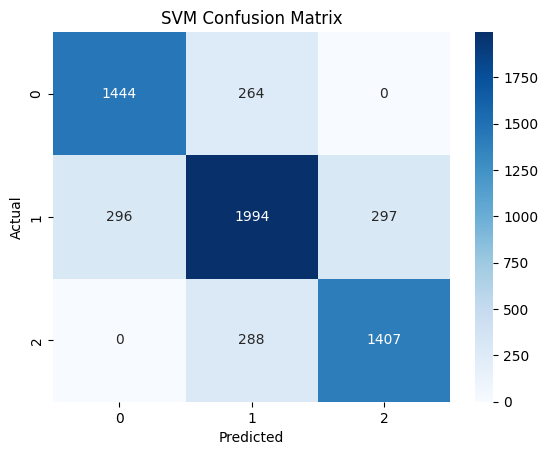

In [8]:
#Confusion Matrix for SVM
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Feature Importance — Permutation Importance

In [9]:
from sklearn.inspection import permutation_importance
import pandas as pd

perm = permutation_importance(
    svm,
    X_test,
    y_test,
    scoring='f1_macro',
    n_repeats=10,
    random_state=42
)

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': perm.importances_mean
}).sort_values(by='importance', ascending=False)

In [10]:
feature_importance = feature_importance.reset_index(drop=True)
feature_importance


,feature,importance
0,mood,0.481729
1,grade,0.000897
2,age,0.000827
3,day,0.000445
4,support_feeling,0.000398
5,country_Brazil,0.000258
6,exercised_today,0.000253
7,country_Canada,0.000207
8,social_interaction_rating,0.000090
9,meditated_today,0.000064


# Model Summary

-The dataset was split into training and testing sets using an 80:20 ratio. Stratified sampling was applied to preserve the distribution of stress categories across both sets. 

-The training set was used for model training and hyperparameter tuning, while the test set was held out for final evaluation. 

-Logistic Regression model was used as a baseline to provide a point of comparison. Its performance showed that the dataset contains useful information for predicting stress levels, especially when emotional features such as mood are included. Tree-based models like Random Forest and XGBoost were able to model non-linear patterns, but in some cases they tended to favor the most common stress category.

# Metric Evaluation & Interpretation
Model performance was assessed using:

-Accuracy – overall correctness 

-Precision, Recall, and F1-score – class-wise performance 

-Macro-averaged F1-score – metric for balanced evaluation  

-Confusion Matrix – qualitative error analysis


#### Final SVM Performance (With Mood)

Accuracy: ~80%

Macro F1-score: ~0.81

High Stress Recall: ~0.84

The model achieved strong and balanced performance across all three stress categories. Low and high stress were classified with high precision and recall, while medium stress remained the most ambiguous class an expected outcome due to its overlap with both extremes.

The confusion matrix revealed no extreme misclassifications (i.e., low stress predicted as high stress or vice versa). Errors occurred primarily between adjacent stress levels.

# Ablation Study (Experiment only refer 03_modelling_v1.ipynb)
-This study was done WITHOUT 'mood' feature.

-When the mood feature was removed, model performance dropped sharply across all algorithms, indicating a substantial loss of predictive signal. The SVM model’s accuracy decreased to 0.33.which is close to random guessing for a three-class problem, with a macro F1-score of 0.33. Precision and recall were low and relatively balanced across all classes.

-Random Forest achieved an accuracy of 0.41, primarily by predicting the majority class (medium stress), as reflected by its high recall for medium stress (0.82) and very low recall for low (0.10) and high (0.08) stress

-Overall, these results confirm that MOOD IS A CRITICAL PREDICTOR of daily stress. Without it, behavioral and demographic features alone are insufficient for reliable multi-class stress prediction.


# Feature Importance
Permutation importance analysis further supported these findings. Mood dominated feature importance, causing a large drop in macro F1-score. Other features—including sleep duration, screen time, social interaction, and demographic variables—exhibited near-zero or negative importance once mood was included.

# Conclusion

This study demonstrates that daily stress prediction is most effective when behavioral and contextual features are complemented by proximal emotional self-reporting. Among all evaluated models, the SVM provided the most balanced and ethically appropriate performance, achieving high accuracy while maintaining strong recall for high-stress cases.

The ablation study and feature importance analysis collectively show that mood is the primary driver of stress classification, while other features play a secondary, supportive role.

Overall, the results highlight the importance of emotional state in short-term stress assessment and validate the use of non-linear models with balanced evaluation metrics for prediction tasks.